# San Joaquin Valley Existing Vegetation
This notebook performs the ETL of the California Central Coast and Central Valley vegetation survey in order to compute the land surface used for each type of forest cover per Township-Range and year.

Related links:
* For the documentation about this dataset, its source, how to download it, and the features of interest, please refer to our [Vegetation Datasets](doc/assets/vegetation.md) documentation
* For the explanations on how the vegetation mapping datasets are overlaid with Township-Range boundaries to obtain the amount of land used for each crop type in each township, please refer to our [Overlaying San Joaquin Valley Township Boundaries](doc/etl/township_overlay.md) documentation

In [1]:
# For Deepnote to be able to use the custom libraries in the parent ../lib folder
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
from lib.vegetation import VegetationDataset

Load the data by instantiating the VegetationDataset class based on the geospatial map data for the central valley and central coast areas.

__Note:__ If the data are not available locally, they will be downloaded from their source first, which will take some time as there are two 900MB geospatial datasets. Be patient.

In [3]:
vegetation_df = VegetationDataset()

Loading local datasets. Please wait...
Loading of datasets complete.


Pre-process the vegetation dataset to keep only the selected features for the final analysis.

In [4]:
vegetation_df.preprocess_map_df(features_to_keep=["SAF_COVER_TYPE", "geometry"])

In [5]:
vegetation_df.map_df

,VEGETATION_TYPE,geometry,YEAR
0,Non Forest,"MULTIPOLYGON (((-121.01241 36.62881, -121.0124...",2019
1,Non Forest,"MULTIPOLYGON (((-120.91174 36.61289, -120.9117...",2019
2,Non Forest,"MULTIPOLYGON (((-120.32605 36.20565, -120.3260...",2019
3,Non Forest,"MULTIPOLYGON (((-121.53567 36.02781, -121.5356...",2019
4,Non Forest,"MULTIPOLYGON (((-119.69018 34.94837, -119.6901...",2019
...,...,...,...
54804,Non Forest,"MULTIPOLYGON (((-121.27291 38.95855, -121.2725...",2019
54805,Non Forest,"MULTIPOLYGON (((-120.64721 37.98345, -120.6472...",2019
54806,Non Forest,"MULTIPOLYGON (((-119.44758 37.03244, -119.4475...",2019
54807,Non Forest,"MULTIPOLYGON (((-119.44680 37.03424, -119.4468...",2019


Overlay the San Joaquin Valley township boundaries on the Vegetation dataset to cut the crops land areas with the township boundaries, thus extracting all the existing vegetation types per townships.

In [6]:
vegetation_df.overlay_township_boundaries()

Display the map of the Vegetation dataset

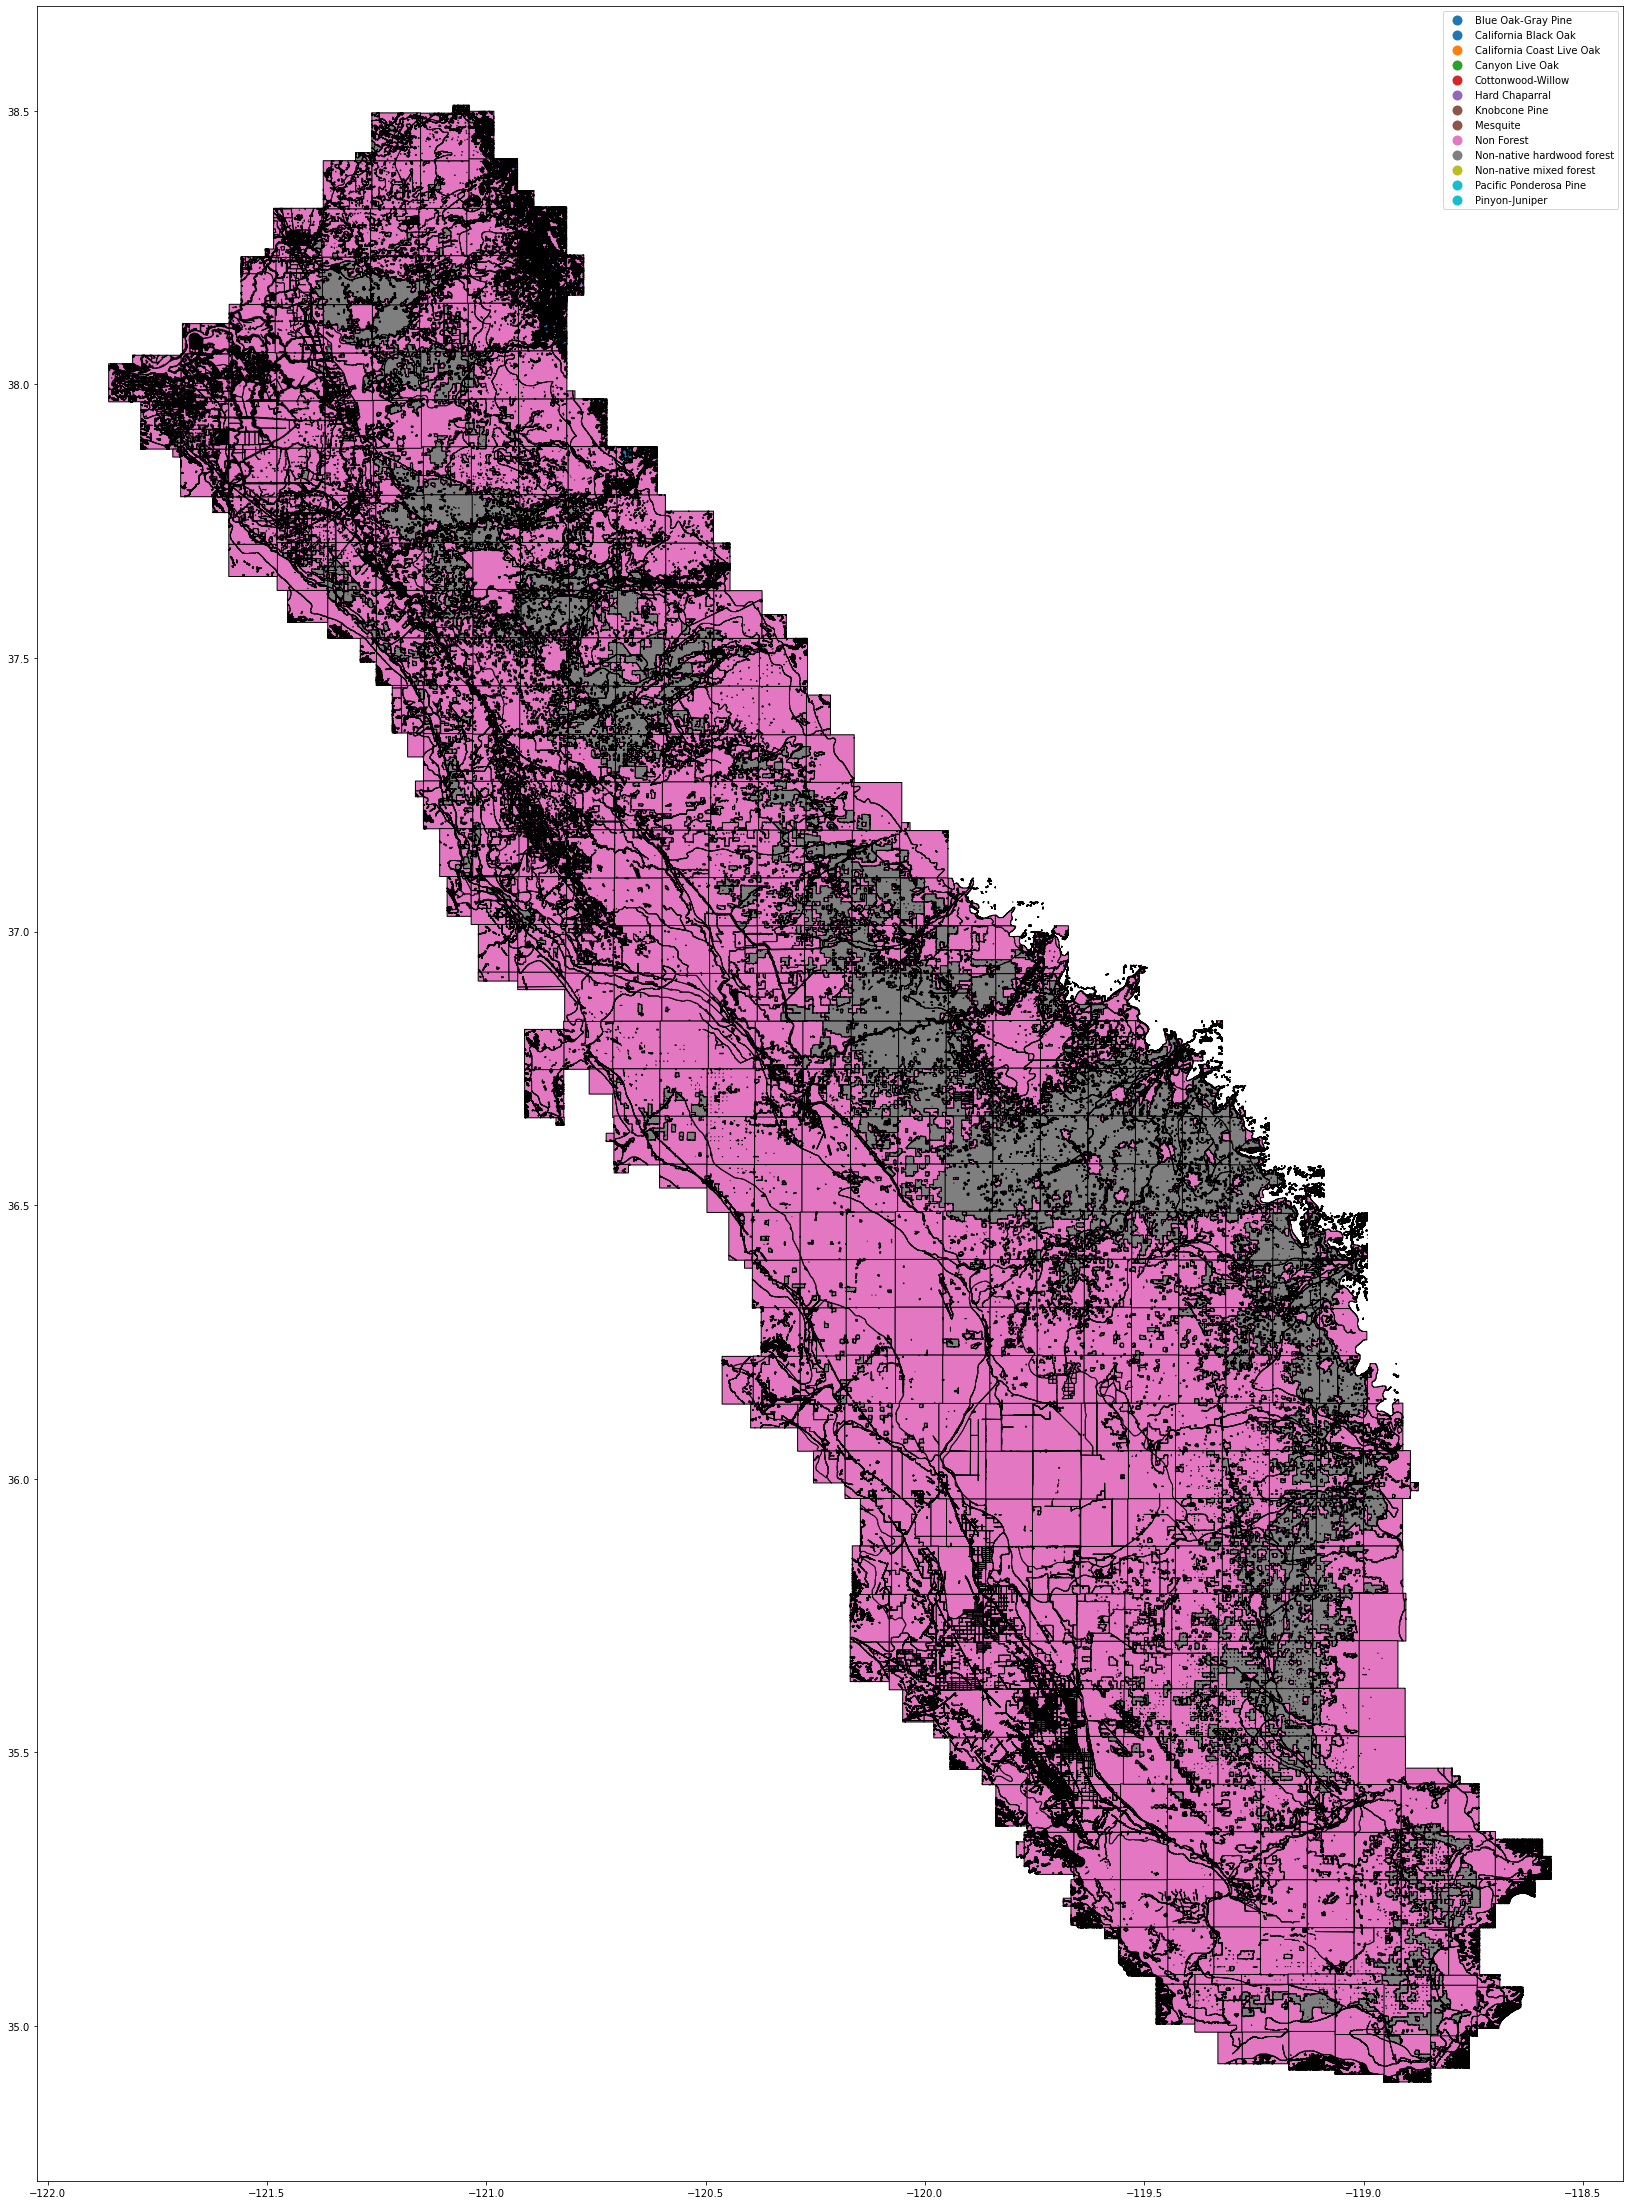

In [7]:
# This geospatial dataset has too many small complex features to display on a Folium map or with Altair so we use Matplotlib here
fig, ax = plt.subplots(figsize=(40,40))
vegetation_df.map_df.plot(ax=ax, column="VEGETATION_TYPE", edgecolor='black', linewidth = 1, cmap=None, legend=True)
plt.show()

In [8]:
vegetation_df.fill_townships_with_no_data(features_to_fill=["VEGETATION_TYPE"], feature_value="X")
vegetation_df.map_df

,VEGETATION_TYPE,YEAR,TOWNSHIP_RANGE,geometry
0,Non Forest,2019,T11N R24W,"MULTIPOLYGON (((-119.42047 35.00385, -119.4204..."
1,Non Forest,2019,T11N R24W,"MULTIPOLYGON (((-119.40098 35.07700, -119.4013..."
2,Non Forest,2019,T11N R24W,"MULTIPOLYGON (((-119.42047 35.00337, -119.4204..."
3,Non Forest,2019,T11N R24W,"MULTIPOLYGON (((-119.38784 35.06028, -119.3878..."
4,Non Forest,2019,T11N R24W,"POLYGON ((-119.40156 35.07134, -119.40189 35.0..."
...,...,...,...,...
10929,Non Forest,2019,NaN,"POLYGON ((-120.07566 35.87731, -120.07591 35.8..."
10930,Non Forest,2019,NaN,"POLYGON ((-119.96823 35.87731, -119.98604 35.8..."
10931,Non Forest,2019,NaN,"POLYGON ((-119.98604 35.89494, -119.98604 35.9..."
10932,Non Forest,2019,NaN,"MULTIPOLYGON (((-119.97599 35.96371, -119.9759..."


In [9]:
vegetation_df.pivot_township_categorical_feature_for_output(feature_name="VEGETATION_TYPE", feature_prefix="VEGETATION")
vegetation_df.drop_features(drop_rate=0.05, unwanted_features=["VEGETATION_X", "VEGETATION_NON_FOREST"])

In [10]:
vegetation_df.output_df

,TOWNSHIP_RANGE,YEAR,VEGETATION_BLUE_OAK-GRAY_PINE,VEGETATION_CALIFORNIA_COAST_LIVE_OAK,VEGETATION_CANYON_LIVE_OAK,VEGETATION_HARD_CHAPARRAL,VEGETATION_KNOBCONE_PINE,VEGETATION_NON-NATIVE_HARDWOOD_FOREST,VEGETATION_PINYON-JUNIPER
0,T01N R02E,2019,0.010798,0.002749,0.000000,0.000633,0.000000,0.063803,0.0
1,T01N R03E,2019,0.000037,0.000137,0.000000,0.000386,0.000000,0.095148,0.0
2,T01N R04E,2019,0.000236,0.007970,0.000000,0.005475,0.000000,0.000089,0.0
3,T01N R05E,2019,0.000686,0.001700,0.000000,0.004826,0.000000,0.002087,0.0
4,T01N R06E,2019,0.000252,0.000974,0.000000,0.000631,0.000000,0.001094,0.0
...,...,...,...,...,...,...,...,...,...
473,T32S R26E,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000248,0.0
474,T32S R27E,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
475,T32S R28E,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.151514,0.0
476,T32S R29E,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.349906,0.0


In [11]:
vegetation_df.output_dataset_to_csv("../assets/outputs/vegetation.csv")